# INTRODUCTION TO COMMUNICATION SYSTEM
**END SEMESTER PROJECT**
BATCH : B
GROUP : 2
**TOPIC: NETWORK LOAD BALANCING SYSTEM**

In [2]:
import time
import random


class Router:
    def __init__(self, router_id):
        self.router_id = router_id
        self.connected_devices = []

    def connect_device(self, device):
        self.connected_devices.append(device)

    def process_packet(self, packet):
        # Simulating packet processing time
        time.sleep(random.uniform(0.1, 0.5))


class Switch:
    def __init__(self, switch_id):
        self.switch_id = switch_id
        self.connected_routers = []
        self.connected_devices = []

    def connect_router(self, router):
        self.connected_routers.append(router)

    def connect_device(self, device):
        self.connected_devices.append(device)

    def forward_packet(self, packet, destination_router):
        # Simulating packet forwarding time
        time.sleep(random.uniform(0.2, 0.8))
        destination_router.process_packet(packet)


class Computer:
    def __init__(self, computer_id):
        self.computer_id = computer_id

    def send_packet(self, packet, switch):
        # Simulating packet sending time
        time.sleep(random.uniform(0.1, 0.3))
        switch.forward_packet(packet, random.choice(switch.connected_routers))


class Packet:
    def __init__(self, data):
        self.data = data


class LoadBalancer:
    def __init__(self, routers):
        self.routers = routers

    def balance_traffic(self):
        while True:
            # Get latencies and transmission rates
            latencies = self.get_latencies()
            transmission_rates = self.get_transmission_rates()

            # Perform traffic balancing
            target_router = self.weighted_round_robin(latencies, transmission_rates)
            self.route_traffic(target_router)

            # Display latency and transmission rate values
            self.display_metrics(latencies, transmission_rates)

            # Wait for a certain period before balancing traffic again
            time.sleep(1)

    def get_latencies(self):
        latencies = {}
        for router in self.routers:
            # Simulating latency measurement
            latency = random.uniform(0.1, 0.5)
            latencies[router.router_id] = latency
        return latencies

    def get_transmission_rates(self):
        transmission_rates = {}
        for router in self.routers:
            # Simulating transmission rate measurement
            transmission_rate = random.uniform(1, 10)
            transmission_rates[router.router_id] = transmission_rate
        return transmission_rates

    def weighted_round_robin(self, latencies, transmission_rates):
        # Calculate weight for each router based on latency and transmission rate
        weights = {
            router.router_id: (1 / latencies[router.router_id]) * transmission_rates[router.router_id]
            for router in self.routers
        }

        # Perform weighted round-robin for traffic balancing
        total_weight = sum(weights.values())
        cumulative_weights = [
            sum(weights[router.router_id] for router in self.routers[:i + 1]) / total_weight
            for i in range(len(self.routers))
        ]

        # Determine target router based on cumulative weights
        random_number = random.uniform(0, 1)
        for i, router in enumerate(self.routers):
            if random_number <= cumulative_weights[i]:
                return router

    def route_traffic(self, target_router):
        target_router.connect_device(Computer(1))  # Simulating a computer connecting to the target router

        # Display the routing information
        print(f"Traffic routed to Router {target_router.router_id}")

    def visualize_latency(self):
        plt.figure(figsize=(12, 6))
        for router in self.routers:
            router_latencies = [self.latency_values[step][router.router_id] for step in self.time_steps]
            plt.plot(self.time_steps, router_latencies, label=router.router_id)

        plt.title('Latency Variation over Time')
        plt.xlabel('Time Steps')
        plt.ylabel('Latency')
        plt.legend()
        plt.grid(True)
        plt.show()

    def display_metrics(self, latencies, transmission_rates):
        print("Latency values:")
        for router_id, latency in latencies.items():
            print(f"Router {router_id}: {latency}")

        print("\nTransmission rate values:")
        for router_id, transmission_rate in transmission_rates.items():
            print(f"Router {router_id}: {transmission_rate}")

        print("\n")


def simulate_network():
    # Creating routers, switches, and computers
    routers = []
    switches = []
    computers = []

    # Adding routers
    for floor in range(3):
        for building in range(3):
            for i in range(15):
                router_id = f"Router_{building + 1}_{floor + 1}_{i + 1}"
                router = Router(router_id)
                routers.append(router)

    # Adding switches
    for i in range(3):
        switch_id = f"Switch_{i + 1}"
        switch = Switch(switch_id)
        switches.append(switch)

    # Adding computers
    for i in range(30):
        computer_id = f"Computer_{i + 1}"
        computer = Computer(computer_id)
        computers.append(computer)

    # Connecting devices
    for router in routers:
        router.connect_device(random.choice(computers))
        for _ in range(random.randint(2, 3)):
            router.connect_device(random.choice(routers))

    for switch in switches:
        switch.connect_router(random.choice(routers))
        switch.connect_device(random.choice(computers))

    # Creating a load balancer instance and starting traffic balancing
    load_balancer = LoadBalancer(routers)
    load_balancer.balance_traffic()


simulate_network()


Traffic routed to Router Router_2_3_15
Latency values:
Router Router_1_1_1: 0.11770140163473038
Router Router_1_1_2: 0.15682599219071044
Router Router_1_1_3: 0.3945177308636373
Router Router_1_1_4: 0.3447609396199286
Router Router_1_1_5: 0.45653703043820804
Router Router_1_1_6: 0.304683555577708
Router Router_1_1_7: 0.12667026225119038
Router Router_1_1_8: 0.22831445839853537
Router Router_1_1_9: 0.11026719778904961
Router Router_1_1_10: 0.3817598310167324
Router Router_1_1_11: 0.17902821677824834
Router Router_1_1_12: 0.3512526404781292
Router Router_1_1_13: 0.48143243313260475
Router Router_1_1_14: 0.18180338802170334
Router Router_1_1_15: 0.3272448064124361
Router Router_2_1_1: 0.4241963025726816
Router Router_2_1_2: 0.36218547533794443
Router Router_2_1_3: 0.49111754359524407
Router Router_2_1_4: 0.3717309928214503
Router Router_2_1_5: 0.20599017127426975
Router Router_2_1_6: 0.42336793779538573
Router Router_2_1_7: 0.3221442160121577
Router Router_2_1_8: 0.12146163395633769
Router

KeyboardInterrupt: ignored

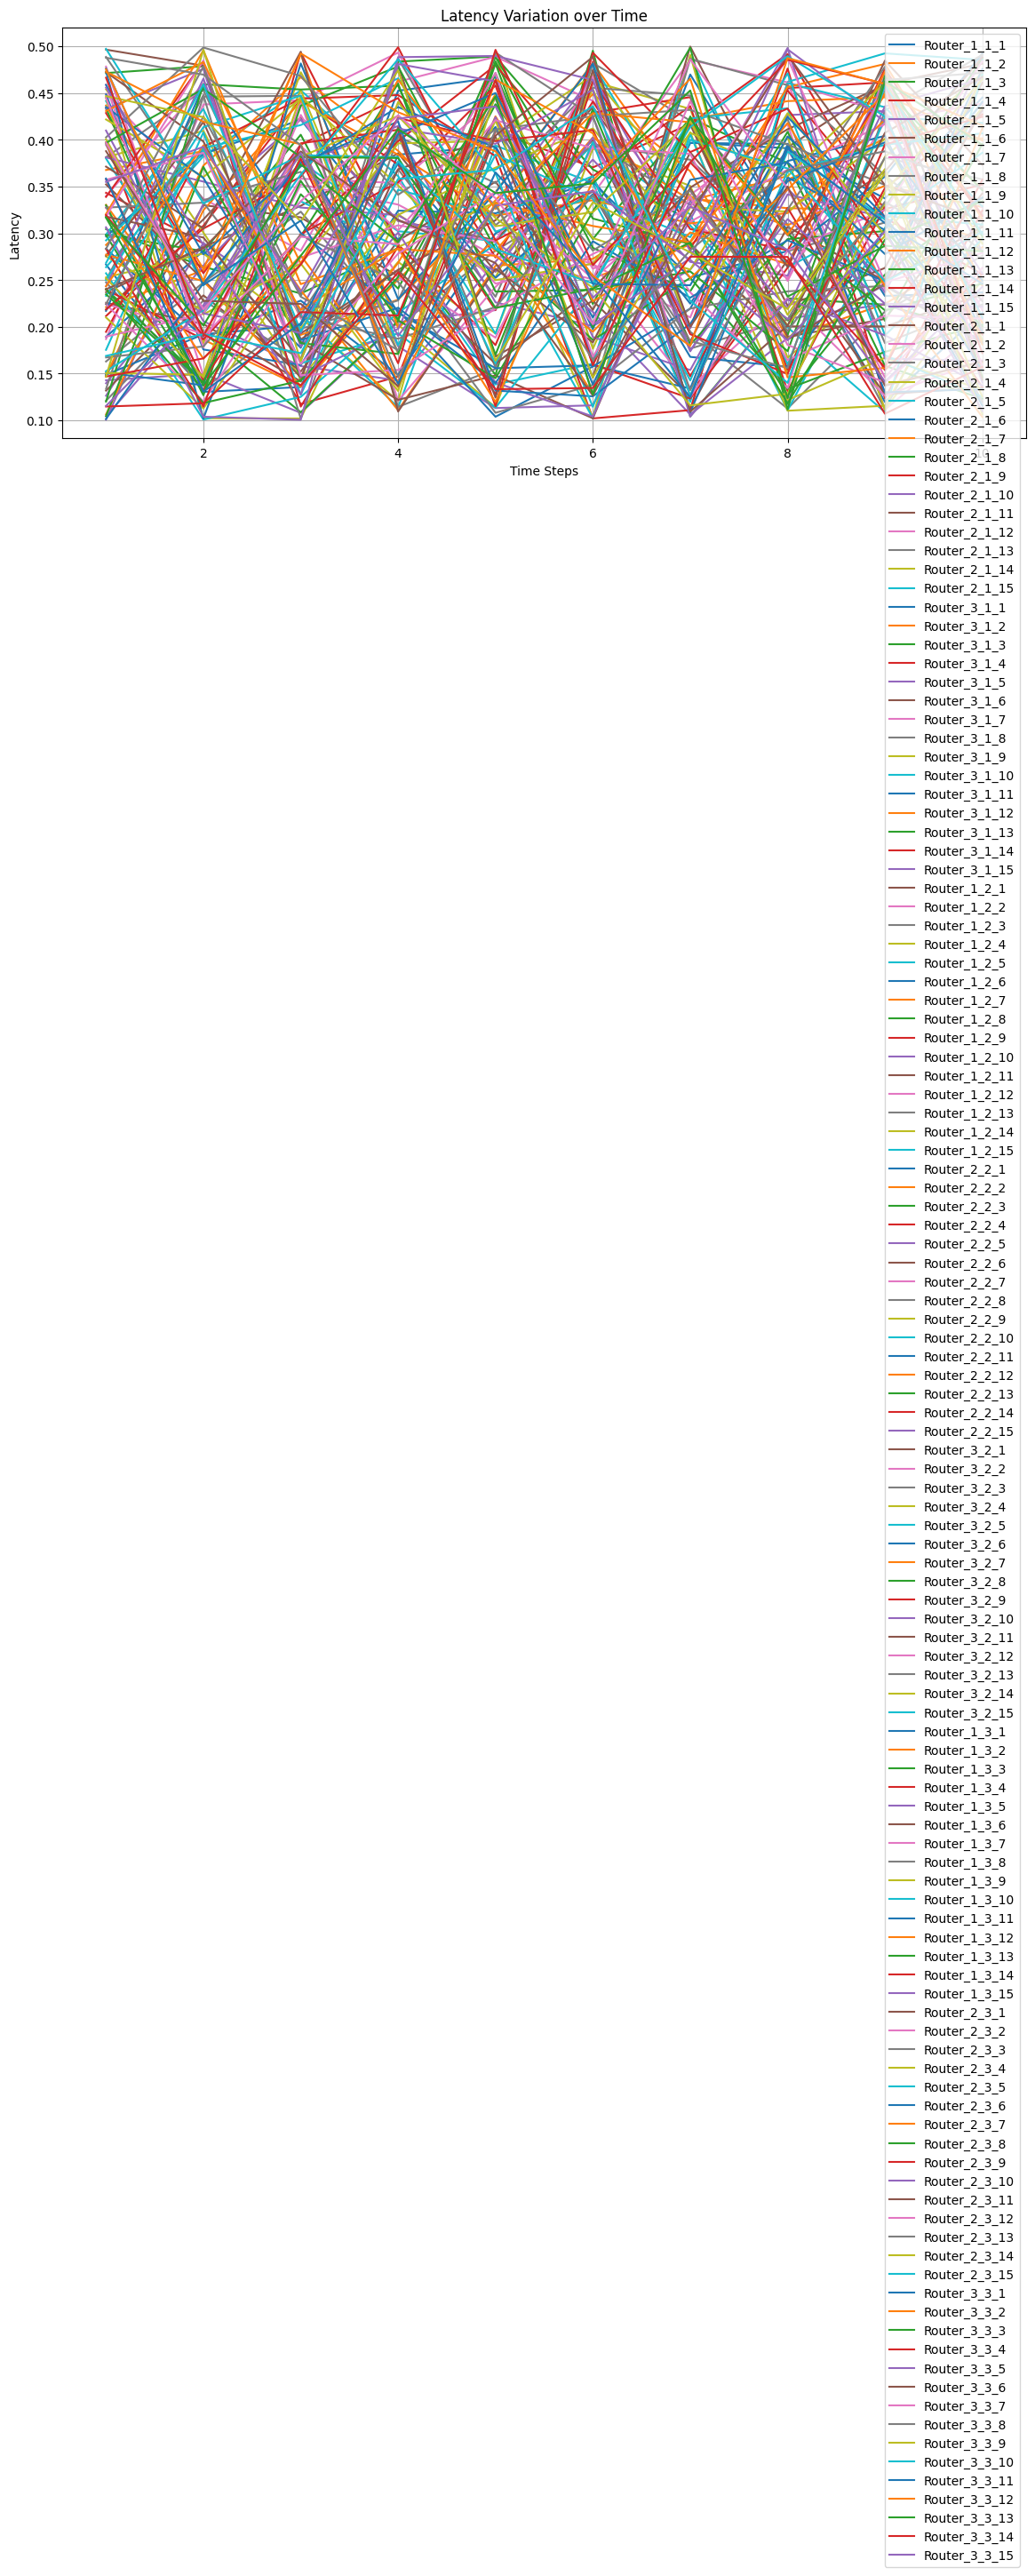

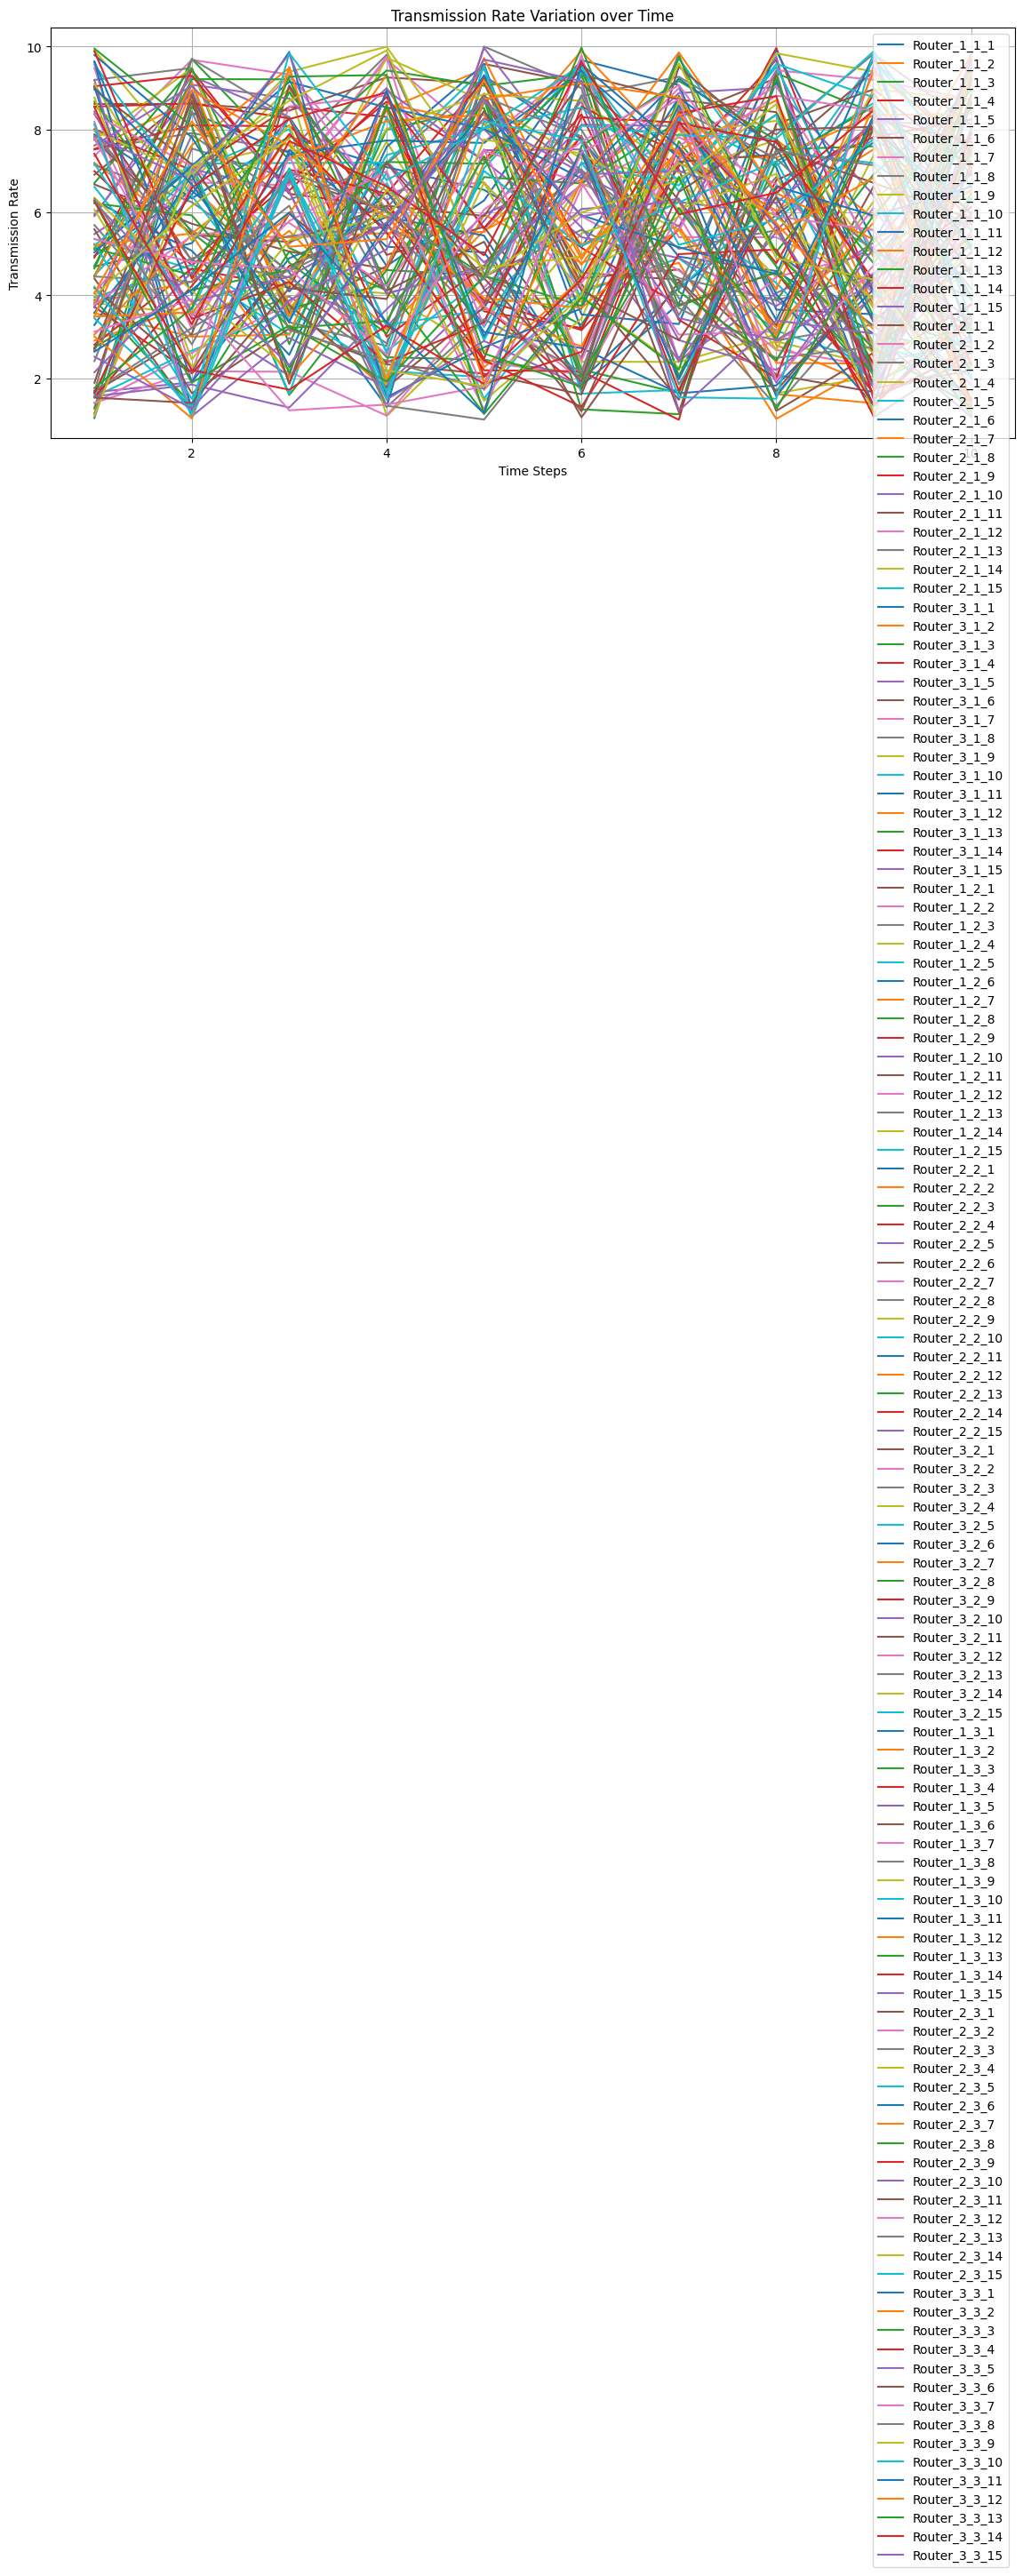

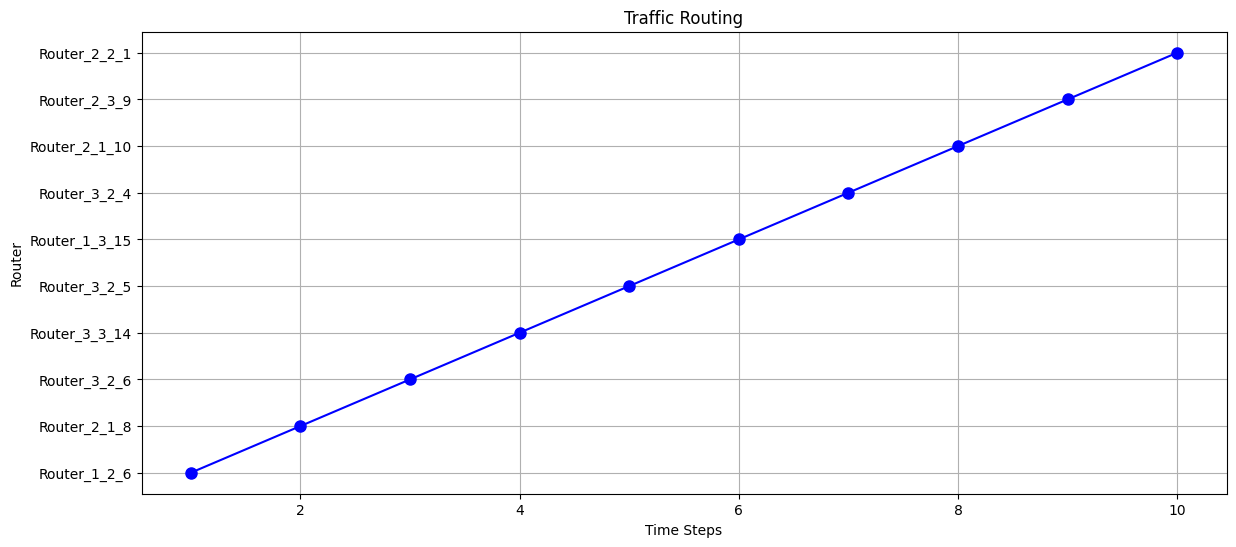

In [1]:
import time
import random
import matplotlib.pyplot as plt

class Router:
    def __init__(self, router_id):
        self.router_id = router_id
        self.connected_devices = []

    def connect_device(self, device):
        self.connected_devices.append(device)

    def process_packet(self, packet):
        # Simulating packet processing time
        time.sleep(random.uniform(0.1, 0.5))

    # Other router methods


class Switch:
    def __init__(self, switch_id):
        self.switch_id = switch_id
        self.connected_routers = []
        self.connected_devices = []

    def connect_router(self, router):
        self.connected_routers.append(router)

    def connect_device(self, device):
        self.connected_devices.append(device)

    def forward_packet(self, packet, destination_router):
        # Simulating packet forwarding time
        time.sleep(random.uniform(0.2, 0.8))
        destination_router.process_packet(packet)

    # Other switch methods


class Computer:
    def __init__(self, computer_id):
        self.computer_id = computer_id

    def send_packet(self, packet, switch):
        # Simulating packet sending time
        time.sleep(random.uniform(0.1, 0.3))
        switch.forward_packet(packet, random.choice(switch.connected_routers))

    # Other computer methods


class Packet:
    def __init__(self, data):
        self.data = data


class LoadBalancer:
    def __init__(self, routers):
        self.routers = routers
        self.latency_values = {}
        self.transmission_rate_values = []
        self.traffic_routing_info = []
        self.time_steps = []

    def get_latencies(self):
        latencies = {}
        for router in self.routers:
            # Simulating latency measurement
            latency = random.uniform(0.1, 0.5)
            latencies[router.router_id] = latency
        return latencies

    def get_transmission_rates(self):
        transmission_rates = []
        for router in self.routers:
            # Simulating transmission rate measurement
            transmission_rate = random.uniform(1, 10)
            transmission_rates.append(transmission_rate)
        return transmission_rates

    def weighted_round_robin(self, latencies, transmission_rates):
        # Calculate weight for each router based on latency and transmission rate
        weights = {router.router_id: (1 / latencies[router.router_id]) * transmission_rates[i]
                   for i, router in enumerate(self.routers)}

        # Perform weighted round-robin for traffic balancing
        total_weight = sum(weights.values())
        cumulative_weights = [sum(weights[router.router_id] for router in self.routers[:i + 1]) / total_weight
                              for i in range(len(self.routers))]

        # Determine target router based on cumulative weights
        random_number = random.uniform(0, 1)
        for i, router in enumerate(self.routers):
            if random_number <= cumulative_weights[i]:
                return router

    def balance_traffic(self, num_steps):
        for step in range(num_steps):
            self.time_steps.append(step + 1)

            # Get latencies and transmission rates
            latencies = self.get_latencies()
            transmission_rates = self.get_transmission_rates()
            self.latency_values[step + 1] = latencies
            self.transmission_rate_values.append(transmission_rates)

            # Perform traffic balancing
            target_router = self.weighted_round_robin(latencies, transmission_rates)
            self.route_traffic(target_router, step + 1)

            # Wait for a certain period before balancing traffic again
            time.sleep(1)

    def route_traffic(self, target_router, step):
        target_router.connect_device(Computer(1))  # Simulating a computer connecting to the target router

        # Display the routing information
        self.traffic_routing_info.append((step, target_router.router_id))

    def visualize_latency(self):
        plt.figure(figsize=(14, 6))
        for router in self.routers:
            router_latencies = [self.latency_values[step][router.router_id] for step in self.time_steps]
            plt.plot(self.time_steps, router_latencies, label=router.router_id)

        plt.title('Latency Variation over Time')
        plt.xlabel('Time Steps')
        plt.ylabel('Latency')
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_transmission_rate(self):
        plt.figure(figsize=(14, 6))
        for i, router in enumerate(self.routers):
            router_transmission_rates = [transmission_rates[i] for transmission_rates in self.transmission_rate_values]
            plt.plot(self.time_steps, router_transmission_rates, label=router.router_id)

        plt.title('Transmission Rate Variation over Time')
        plt.xlabel('Time Steps')
        plt.ylabel('Transmission Rate')
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_traffic_routing(self):
        steps = [step for step, _ in self.traffic_routing_info]
        routers = [router for _, router in self.traffic_routing_info]

        plt.figure(figsize=(14, 6))
        plt.plot(steps, routers, 'bo-', markersize=8)
        plt.title('Traffic Routing')
        plt.xlabel('Time Steps')
        plt.ylabel('Router')
        plt.grid(True)
        plt.show()


def simulate_network(num_steps):
    # Creating routers, switches, and computers
    routers = []
    switches = []
    computers = []

    # Adding routers
    for floor in range(3):
        for building in range(3):
            for i in range(15):
                router_id = f"Router_{building+1}_{floor+1}_{i+1}"
                router = Router(router_id)
                routers.append(router)

    # Adding switches
    for i in range(3):
        switch_id = f"Switch_{i+1}"
        switch = Switch(switch_id)
        switches.append(switch)

    # Adding computers
    for i in range(30):
        computer_id = f"Computer_{i+1}"
        computer = Computer(computer_id)
        computers.append(computer)

    # Connecting devices
    for router in routers:
        router.connect_device(random.choice(computers))
        for _ in range(random.randint(2, 3)):
            router.connect_device(random.choice(routers))

    for switch in switches:
        switch.connect_router(random.choice(routers))
        switch.connect_device(random.choice(computers))

    # Creating a load balancer instance and starting traffic balancing
    load_balancer = LoadBalancer(routers)
    load_balancer.balance_traffic(num_steps)

    # Visualize latency, transmission rate, and traffic routing
    load_balancer.visualize_latency()
    load_balancer.visualize_transmission_rate()
    load_balancer.visualize_traffic_routing()


simulate_network(num_steps=10)
